In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
movies = pd.read_csv('movies.csv', sep=";", encoding = "latin")
users = pd.read_csv('users.csv', sep=";")
ratings = pd.read_csv("ratings.csv", sep=";")

In [22]:
for df in[users, ratings, movies]:
    print(df.head())

   userId gender  age  occupation zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7     2460
4       5      M   25          20    55455
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   movieId                               title                        genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

  Unnamed: 3  
0        NaN  
1  

In [23]:
data=pd.merge(pd.merge(ratings,users),movies)
data.head()

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres,Unnamed: 3
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,NaN
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,NaN


In [24]:
data.drop('Unnamed: 3', axis=1, inplace=True)
data.head()

,userId,movieId,rating,timestamp,gender,age,occupation,zip-code,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [25]:
data.isna().sum()

userId        0
movieId       0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip-code      0
title         0
genres        0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userId      1000209 non-null  int64 
 1   movieId     1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip-code    1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [27]:
data.iloc[0]

userId                                             1
movieId                                         1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip-code                                       48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [28]:
data.describe()

,userId,movieId,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [29]:
mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [30]:
ratings_by_title=data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3688, dtype: int64

In [31]:
active_titles=ratings_by_title.index[ratings_by_title>=250]

In [32]:
for titles in active_titles[:20]:
    print(titles)

'burbs, The (1989)
10 Things I Hate About You (1999)
101 Dalmatians (1961)
101 Dalmatians (1996)
12 Angry Men (1957)
13th Warrior, The (1999)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001
2010 (1984)
28 Days (2000)
39 Steps, The (1935)
54 (1998)
7th Voyage of Sinbad, The (1958)
8MM (1999)
About Last Night... (1986)
Absent Minded Professor, The (1961)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura


In [33]:
mean_ratings=mean_ratings.loc[active_titles]

In [34]:
top_female_ratings=mean_ratings.sort_values(by="F",ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit,4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [35]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
sorted_by_diff=mean_ratings.sort_values(by='diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [36]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [37]:
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title=rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

<Axes: >

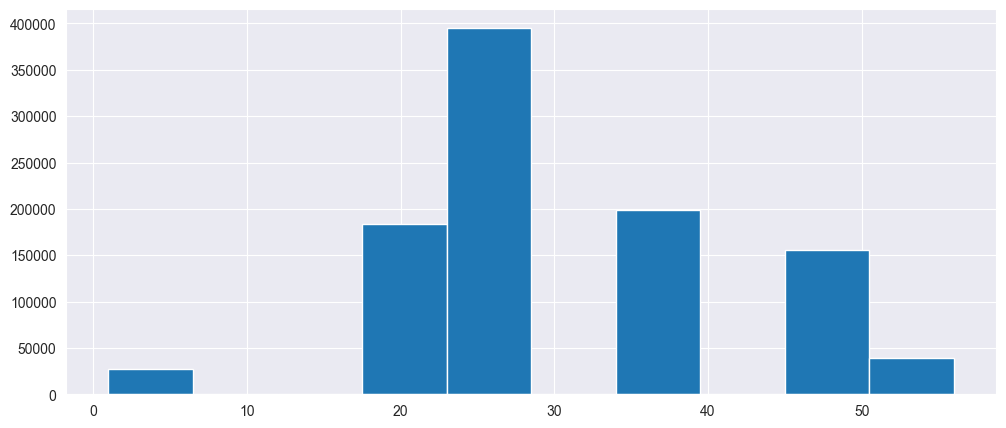

In [39]:
data.age.hist(figsize=(12,5))

<Axes: >

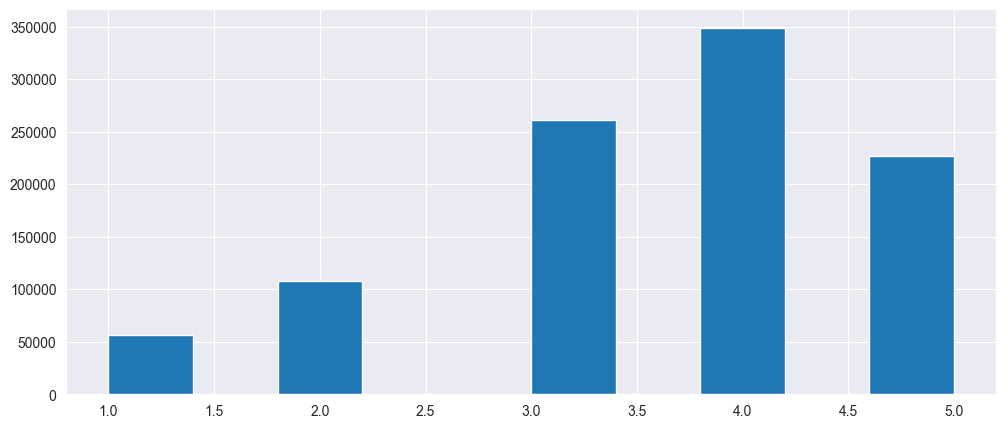

In [40]:
data.rating.hist(figsize=(12,5))